In [20]:
from netCDF4 import Dataset
import os
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm
from matplotlib import colors as c
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import maskoceans
from mpl_toolkits.basemap import interp
from mpl_toolkits.basemap import addcyclic
from mpl_toolkits.basemap import shiftgrid
%matplotlib inline

In [3]:
DIR = os.path.expanduser('D:/Documents/My Job/KOMUNITAS OCY/bootcamp ppython/data hycom')
PATH = os.path.join(DIR, 'maduralon.lat.nc')
ds = xr.open_dataset(PATH)
#cara 2
ds = xr.open_dataset('D:/Documents/My Job/KOMUNITAS OCY/bootcamp ppython/data hycom/maduralon.lat.nc')
print()

In [4]:
ds

<xarray.Dataset>
Dimensions:  (time: 1, depth: 1, lat: 51, lon: 126)
Coordinates:
  * time     (time) datetime64[ns] 2020-02-19T09:00:00
  * depth    (depth) float64 2.0
  * lat      (lat) float64 -8.0 -7.92 -7.84 -7.76 ... -4.24 -4.16 -4.08 -4.0
  * lon      (lon) float64 110.0 110.1 110.2 110.2 ... 119.8 119.8 119.9 120.0
Data variables:
    water_u  (time, depth, lat, lon) float32 ...
    water_v  (time, depth, lat, lon) float32 ...
Attributes: (12/15)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        -8.0
    geospatial_lat_max:        -4.0
    geospatial_lon_min:        110.0
    geospatial_lon_max:        120.0

In [5]:
x = ds.variables['lon'][:]

In [6]:
y = ds.variables["lat"][:]

In [8]:
u = ds.variables["water_u"][:]


In [9]:
v = ds.variables["water_v"][:]

In [10]:
x

<xarray.IndexVariable 'lon' (lon: 126)>
array([110.      , 110.079956, 110.160034, 110.23999 , 110.319946, 110.400024,
       110.47998 , 110.560059, 110.640015, 110.719971, 110.800049, 110.880005,
       110.959961, 111.040039, 111.119995, 111.199951, 111.280029, 111.359985,
       111.439941, 111.52002 , 111.599976, 111.680054, 111.76001 , 111.839966,
       111.920044, 112.      , 112.079956, 112.160034, 112.23999 , 112.319946,
       112.400024, 112.47998 , 112.560059, 112.640015, 112.719971, 112.800049,
       112.880005, 112.959961, 113.040039, 113.119995, 113.199951, 113.280029,
       113.359985, 113.439941, 113.52002 , 113.599976, 113.680054, 113.76001 ,
       113.839966, 113.920044, 114.      , 114.079956, 114.160034, 114.23999 ,
       114.319946, 114.400024, 114.47998 , 114.560059, 114.640015, 114.719971,
       114.800049, 114.880005, 114.959961, 115.040039, 115.119995, 115.199951,
       115.280029, 115.359985, 115.439941, 115.52002 , 115.599976, 115.680054,
       115.76001 , 115.839966, 115.920044, 116.      , 116.079956, 116.160034,
       116.23999 , 116.319946, 116.400024, 116.47998 , 116.560059, 116.640015,
       116.719971, 116.800049, 116.880005, 116.959961, 117.040039, 117.119995,
       117.199951, 117.280029, 117.359985, 117.439941, 117.52002 , 117.599976,
       117.680054, 117.76001 , 117.839966, 117.920044, 118.      , 118.079956,
       118.160034, 118.23999 , 118.319946, 118.400024, 118.47998 , 118.560059,
       118.640015, 118.719971, 118.800049, 118.880005, 118.959961, 119.040039,
       119.119995, 119.199951, 119.280029, 119.359985, 119.439941, 119.52002 ,
       119.599976, 119.680054, 119.76001 , 119.839966, 119.920044, 120.      ])
Attributes:
    long_name:            Longitude
    standard_name:        longitude
    units:                degrees_east
    modulo:               360 degrees
    axis:                 X
    NAVO_code:            2
    _CoordinateAxisType:  Lon

In [11]:
u = np.mean(u, axis = 0) ; u = np.squeeze(u)

In [12]:
v = np.mean(v, axis = 0) ; u = np.squeeze(v)
speed = np.sqrt(u**2+v**2)

In [13]:
mp = Basemap(llcrnrlon=113.2,llcrnrlat=-7.5,
        urcrnrlon=113.8,urcrnrlat=-7.1, area_thresh=0.1, resolution= 'i',
        projection="merc", lat_ts =0)

In [14]:
lon, lat = np.meshgrid(x, y)
x, y = mp(lon, lat)

NameError: name 'cont' is not defined

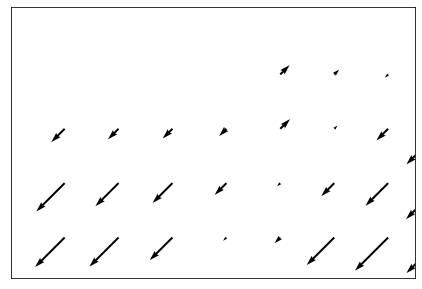

In [21]:
fig = plt.figure(figsize=(12, 5))
qk = mp.quiver(x,y,u,v,scale=1, width = 0.005, headwidth = 3, headlength = 5, color = 'black')
plt.quiverkey(qk, 0.1, -0.1, 0.13, "0.120 m/s" , coordinates='axes')
cb = plt.colorbar(cont)
cb.set_label("kecepatan arus (m/s)", size="x-large")

ValueError: operands could not be broadcast together with shapes (51,126,1) (51,126) 

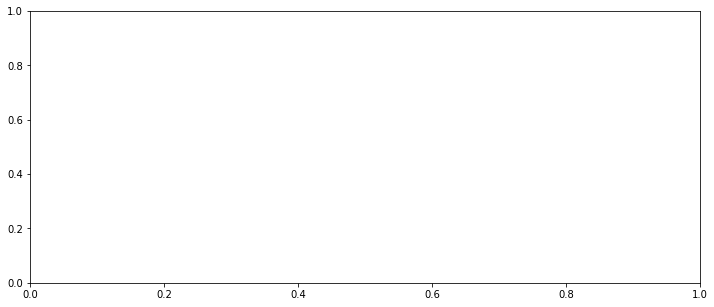

In [15]:
fig = plt.figure(figsize=(12, 5))
cont = mp.contourf(x, y, speed, cmap='jet')
qk = mp.quiver(x,y,u,v,scale=1, width = 0.005, headwidth = 3, headlength = 5, color = 'black')
plt.quiverkey(qk, 0.1, -0.1, 0.13, "0.120 m/s" , coordinates='axes')  # position and reference label

cb = plt.colorbar(cont)
cb.set_label("kecepatan arus (m/s)", size="x-large")

mp.fillcontinents(color="green")
mp.drawcoastlines()
mp.drawcountries()
mp.drawparallels(np.arange(-8, 0, 0.15), labels=[1,0,0,0])  # menggambar garis lintang
mp.drawmeridians(np.arange(110, 125, 0.2), labels=[0,0,1,0])  # menggambar garis bujur

plt.xlabel("", labelpad=30, fontsize=12)
plt.ylabel("", labelpad=30, fontsize=12)
plt.show()

In [13]:
m2 = Basemap(llcrnrlon=112.4,llcrnrlat=-7.8,
        urcrnrlon=114.7,urcrnrlat=-6.6, area_thresh=0.1, resolution= 'i',
        projection="merc", lat_ts =0)

In [14]:
lon, lat = np.meshgrid(x, y)
x, y = m2(lon, lat)

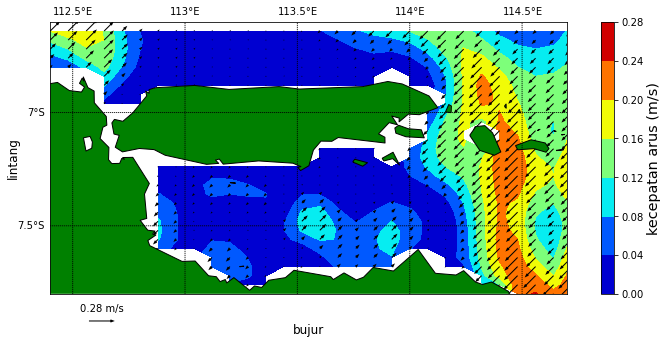

In [15]:
fig = plt.figure(figsize=(12, 5))
contour = m2.contourf(x, y, speed, cmap='jet')
qk = m2.quiver(x,y,u,v,scale=6, width = 0.002, headwidth = 3, headlength = 4, color = 'black')
plt.quiverkey(qk, 0.1, -0.1, 0.30, "0.28 m/s" , coordinates='axes') # position and reference label

cb = plt.colorbar(contour)
cb.set_label("kecepatan arus (m/s)", size="x-large")

m2.fillcontinents(color="green")
m2.drawcoastlines()
m2.drawcountries()
m2.drawparallels(np.arange(-8, 0, 0.5), labels=[1,0,1,0])  #menggambar garis lintang
m2.drawmeridians(np.arange(110, 125, 0.5), labels=[0,1,1,0])  # menggambar garis bujur

plt.xlabel("bujur", labelpad=30, fontsize=12)
plt.ylabel("lintang", labelpad=30, fontsize=12)
plt.show()